<a href="https://colab.research.google.com/github/sarveshmalagi/tensorflow_practice/blob/master/mnist_basic_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

In [4]:
mnist.train.num_examples

55000

In [0]:
import matplotlib.pyplot as plt

In [0]:
sample_image = mnist.train.images[1].reshape(28,28)

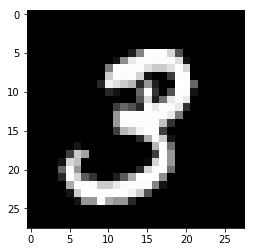

In [7]:
plt.imshow(sample_image, cmap='gist_gray')

In [0]:
x = tf.placeholder(tf.float32, shape=[None, 784])

In [0]:
W = tf.Variable(tf.zeros([784, 10]))

In [0]:
b = tf.Variable(tf.zeros([10]))

In [0]:
y = tf.matmul(x, W) + b

In [0]:
y_true = tf.placeholder(tf.float32, [None, 10])

In [0]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [0]:
train = optimizer.minimize(cross_entropy)

In [0]:
init = tf.global_variables_initializer()

In [17]:
with tf.Session() as sess:
  
  sess.run(init)
  
  for step in range(1000):
    
    batch_x, batch_y = mnist.train.next_batch(100)
    
    sess.run(train, feed_dict={x: batch_x, y_true: batch_y})
    
  
  #Maximum along axis=1
  correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_true, 1))
  
  #[True, False, False, True, True, True, ....] ---> [1, 0, 0, 1, 1, 1]
  acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  
  print(sess.run(acc, feed_dict={x: mnist.test.images, y_true:mnist.test.labels}))

0.9163
